In [17]:
# импортируем библиотеки
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tqdm
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Используется устройство:", device)


Используется устройство: cuda


In [18]:
X = torch.normal(mean=torch.zeros((1000,1)), std = 2)
Y = torch.cos(X)
# переносим на GPU
X = X.to(device)
Y = Y.to(device)

In [19]:
NN = nn.Sequential(nn.Linear(1, 5, bias=True),  # Полносвязный слой: 1 вход → 5 нейронов
                   nn.Tanh(),                   # Функция активации Tanh
                   nn.Linear(5, 5, bias=True),  # Скрытый слой: 5 входов → 5 нейронов
                   nn.Tanh(),
                   nn.Linear(5, 1, bias=True),  # Выходной слой: 5 входов → 1 выход
                   nn.Tanh()).to(device)                  # Функция активации на выходе

In [20]:
X_test = torch.linspace(-6, 6, 1000, device=device)
Y_test = torch.cos(X_test)

nn_prediction = NN(X_test.view(-1, 1))          # с помощью view сделали из вектора → матрицу (n, 1)

In [21]:
# ВАЖНО: переносим на CPU перед numpy
X_test_cpu = X_test.cpu()
Y_test_cpu = Y_test.cpu()
nn_prediction_cpu = nn_prediction.detach().cpu().numpy()

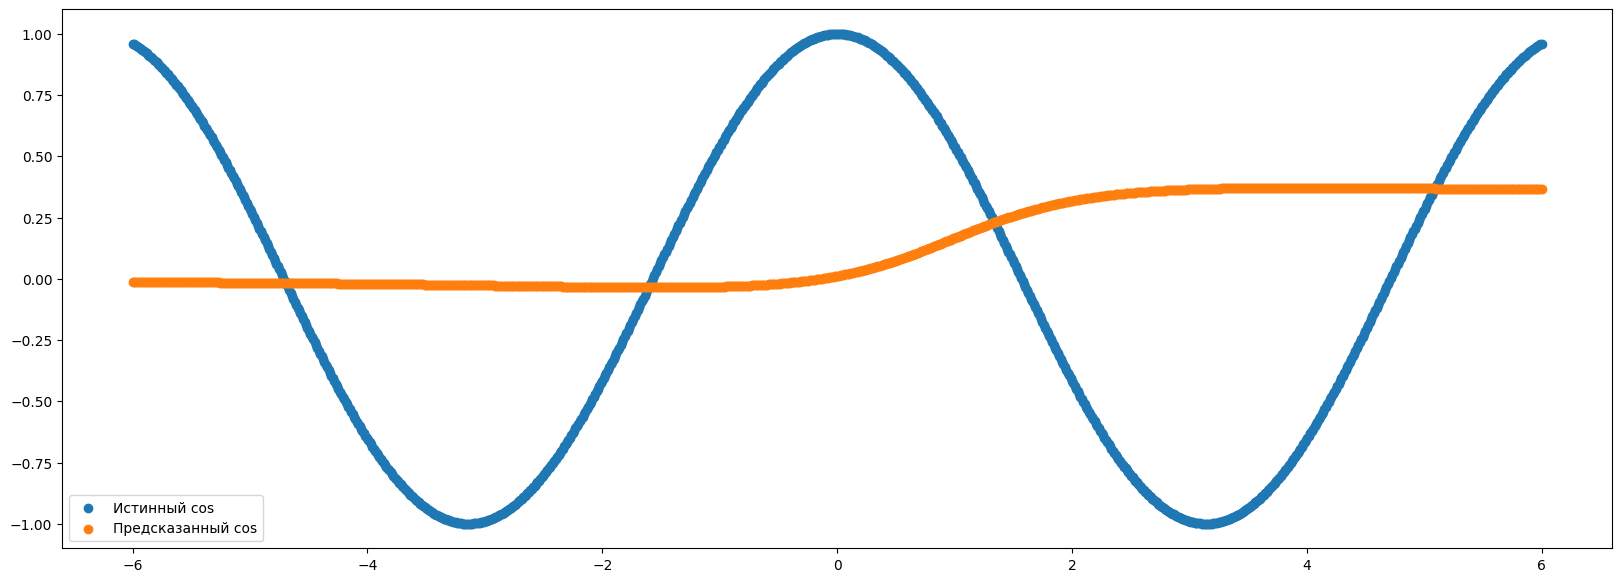

In [22]:
plt.figure(figsize=(20, 7))
plt.scatter(x=X_test.cpu().numpy(), y=Y_test.cpu().numpy(), label='Истинный cos')
plt.scatter(x=X_test.cpu().numpy(), y=nn_prediction.detach().cpu().numpy(), label='Предсказанный cos')
plt.legend()

In [23]:
X = torch.normal(mean=torch.zeros((1000,1)), std = 2)
Y = torch.cos(X)
X = X.to(device)
Y = Y.to(device)
X_test = torch.linspace(-6, 6, 1000).to(device)
Y_test = torch.cos(X_test).to(device)

In [24]:
import tqdm
from tqdm.auto import tqdm

def train(model, X, y, criterion, optimizer, num_epoch):
  model.train()
  for t in tqdm(range(num_epoch)):
      y_pred = model (X)
      loss = criterion(y_pred, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  return model

In [27]:
NN = NN.to(device)
X = X.to(device)
Y = Y.to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(NN.parameters(), lr=0.001)


NN = train(NN, X, Y, criterion, optimizer, 400000)

  0%|          | 0/400000 [00:00<?, ?it/s]

KeyboardInterrupt: 

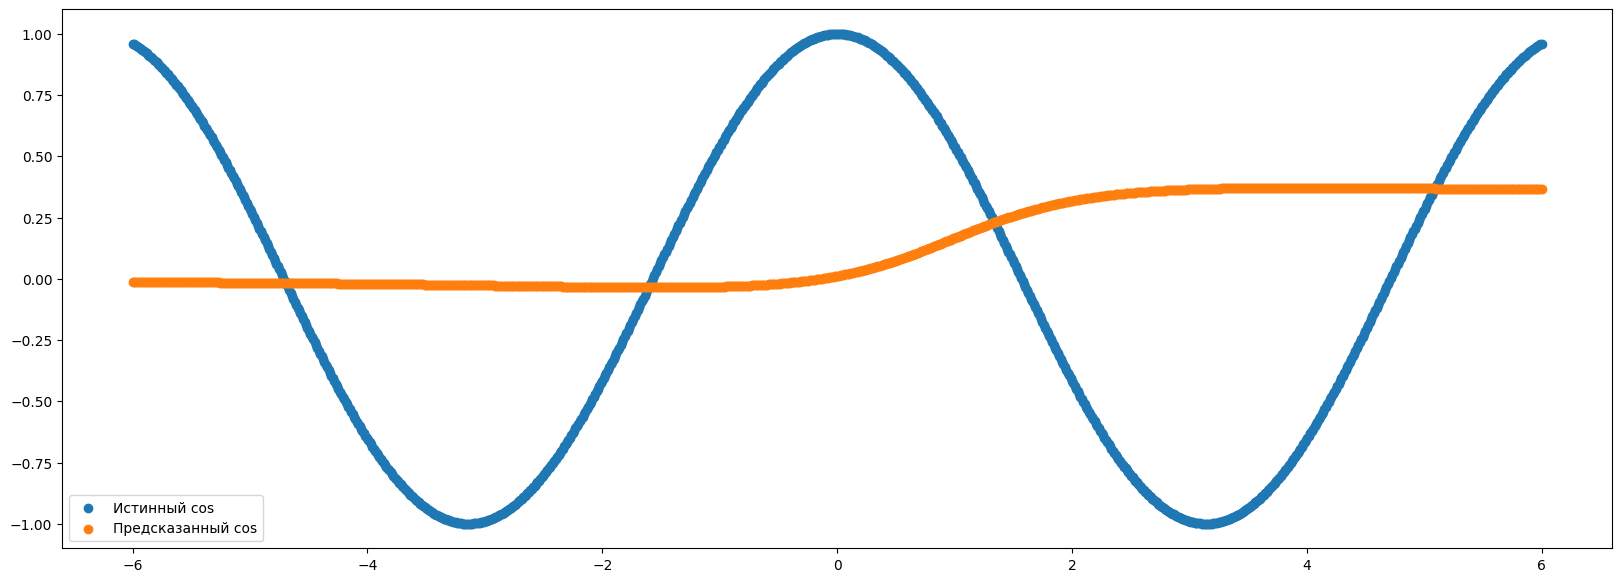

In [26]:
X_plot = X_test.cpu()
Y_plot = Y_test.cpu()
nn_plot = nn_prediction.detach().cpu().numpy()

plt.figure(figsize=(20, 7))
plt.scatter(x=X_test.cpu(), y=Y_test.cpu(), label='Истинный cos')
plt.scatter(x=X_test.cpu(), y=nn_plot, label='Предсказанный cos')
plt.legend()
plt.show()